# Meteor Challenge

Tasks:

    1.Count the number of Stars
    2.Count the number of Meteors
    3.If the Meteors are falling perpendicularly to the Ground (Water level), count how many will fall on the Water
    4.(optional) Find the phrase that is hidden in the dots in the sky. 
        a. HINT 1: 175 Characters
        b. HINT 2: Most of the last tasks’ code can be reused for this one

## Image pre-processing

This first section is where we will build and test the Image Loader, which is a simple Python class that wraps all the main functionalities of image displaying, color masking, and pixel counting that we need to make the code for the challenge questions simpler and easier to understand. The loader was built on top of the openCV and NumPy libraries.

IMPORTANT NOTE: this jupyter notebook was created and developed on Google Colab, the ImageLoader.show() function uses a google proprietary function to print images, and it might not work properly outside Colab

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

class ImageLoader():
  """
    Stores an input image and enables the user to create,
    show and count masks on top of it.
  """
    
  def __init__(self,img):
    """
      stores the input image for further processing

      Args:
        img: A str that represents the image path 
          or a numpy array
    """
    if isinstance(img,np.ndarray):
      self.img = img
    elif isinstance(img,str):
      self.img = cv2.imread(img)
    self.mask = self.img

  def show(self,mask:bool=True):
    """
      Prints the mask or the loader image on the screen

      Args:
        mask: A boolean that defines if the function is going to print 
          the mask or the original image of the loader
    """
    if mask:
      cv2_imshow(self.mask)
    else:
      cv2_imshow(self.img)

  def color_mask(self,min_rgb:list,max_rgb:list = None):
      """
        Generates a color mask of the input image based 
        on the desired RGB range.

        Args:
          min_rgb: A list that contains the lower color 
            limit in RGB format

          max_rgb: A list that contains the upper color
            limit in RGB format. If max_rgb is Null,only
            the lower limit is considered.
      """
      min_rgb.reverse()
      min_color_threshold = np.array(min_rgb, np.uint8)

      if max_rgb is None:
        max_color_threshold = min_color_threshold
      else:
        max_rgb.reverse()
        max_color_threshold = np.array(max_rgb, np.uint8)

      self.mask = cv2.inRange(self.img,min_color_threshold,max_color_threshold)

  def count(self):
    """
      returns the number of pixels tracked by
      the mask that are within the specified 
      RGB range
    """
    return cv2.countNonZero(self.mask)


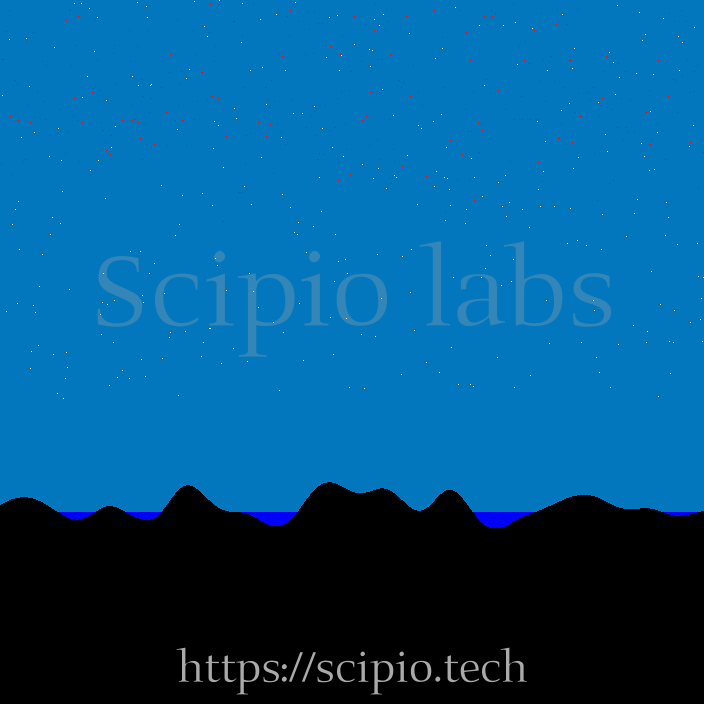

In [23]:
loader = ImageLoader("meteor_challenge_01.png")
loader.show()

### Testing ImageLoader Pixel Count

In [29]:
# NOTE: array test_arr is in BGR and 'rgb' in RGB format

test_arr = np.array([
              [[255,255,255],[255,255,255],[255,255,255],[255,255,255],[255,255,255]],
              [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
              [[255,0,0],[255,0,0],[255,0,0],[255,0,0],[255,0,0]],
              [[0,0,255],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
              [[0,0,255],[0,0,0],[255,255,0],[0,0,0],[0,255,0]],
              [[0,0,255],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
              [[0,0,255],[0,255,0],[0,0,0],[255,255,0],[0,0,0]],
             ])

tests = [
          {
           'color': 'white',
           'rgb':[255,255,255],
           'expected_output':5
          },
          {
           'color': 'red',
           'rgb':[255,0,0],
           'expected_output':4
          },
          {
           'color': 'cyan',
           'rgb':[0,255,255],
           'expected_output':2
          },
          {
           'color' : 'blue',
           'rgb':[0,0,255],
           'expected_output': 5
          },
        ]


test_loader = ImageLoader(test_arr)
test_loader.show()

for test in tests:
  test_loader.color_mask(test['rgb'])
  test_loader.show()

  count = test_loader.count()

  print(f"color: {test['color']}, count: {count}, expected_count: {test['expected_output']}")
  assert count == test['expected_output']





color: white, count: 5, expected_count: 5


color: red, count: 4, expected_count: 4


color: cyan, count: 2, expected_count: 2


color: blue, count: 5, expected_count: 5


## 1.Count the number of Stars

Generates a white color mask, prints the mask as an image and the number of stars (white pixels) detected.


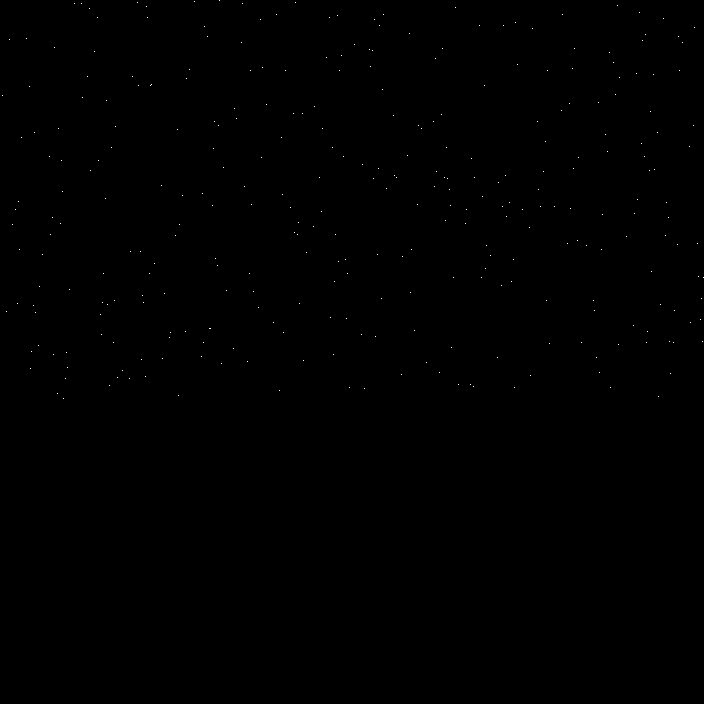

number of white pixels is: 315


In [30]:
# generates a white color mask, prints the mask as an image and the number of stars (white pixels) detected.
loader.color_mask([255,255,255])
loader.show()
print(f"number of white pixels is: {loader.count()}")

## 2.Count the number of Meteors

Generates a red color mask, prints the mask as an image and the number of meteors (red pixels) detected.


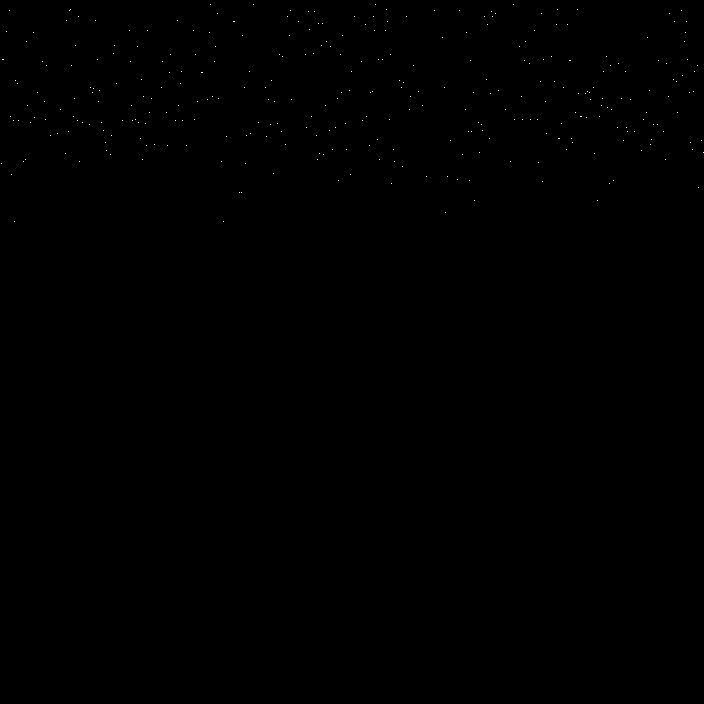

number of red pixels is: 328


In [ ]:
# generates a red color mask, prints the mask as an image and the number of meteors (red pixels) detected.
loader.color_mask([255,0,0])
loader.show()
print(f"number of red pixels is: {loader.count()}")

## 3.If the Meteors are falling perpendicularly to the Ground (Water level), count how many will fall on the Water

On this section, in order to obtain the number of meteors that will fall on the water, we will map the coordinates of blue and red pixels to determine the number of reds that are above the blues.

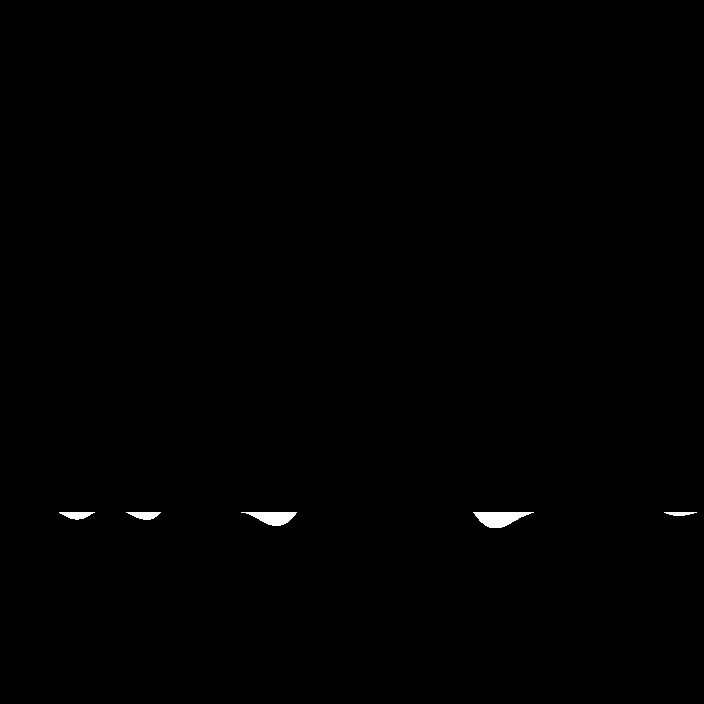

In [34]:
# gets a water mask (pure blue mask) using the ImageLoader
loader.color_mask([0,0,255])
loader.show()
blue_mask = loader.mask

In [35]:
# gets the x axis coordinates of all the pixels detected by the mask
x_coordinates = set()
for y in range(len(blue_mask)): # loop through every pixel in the mask 
  for x in range(len(blue_mask[0])):
    if blue_mask[y][x] != 0: # if the pixel is a pure blue..
      x_coordinates.add(x) # ..add its x coordinate to the set

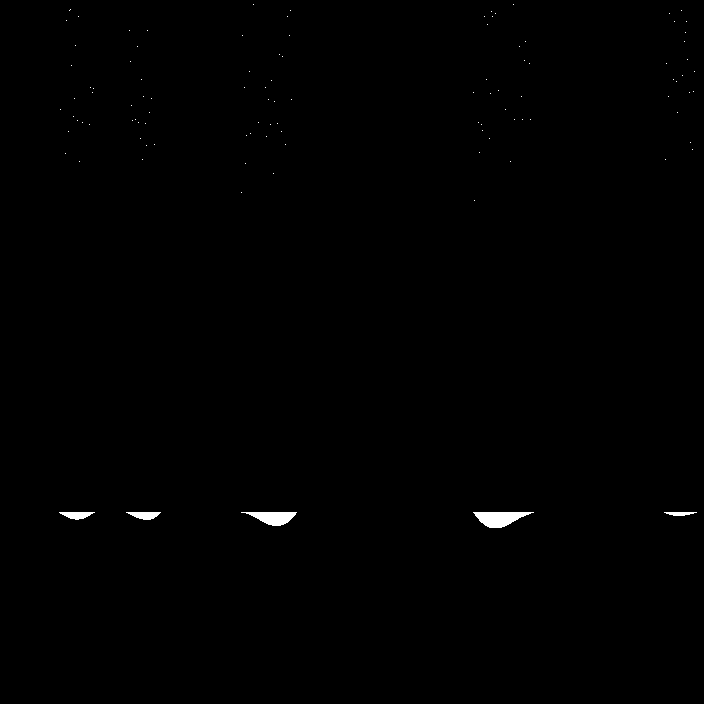

number of meteors directly ahead of a blue pond: 105


In [ ]:
# gets a red mask
loader.color_mask([255,0,0])
meteor_mask = loader.mask

# loop through every pixel in the mask
for y in range(len(meteor_mask)): 
  for x in range(len(meteor_mask[0])):
    pixel = meteor_mask[y,x]
    # if the pixel is a meteor and is above a pond, or in other words, 
    # if the pixel is pure red and its x-axis location matches that of a blue pixel, set it to 0.
    if pixel != 0 and x not in x_coordinates: 
      meteor_mask[y,x] = 0

# print the meteors above a pond
cv2_imshow(meteor_mask | blue_mask)

print(f"number of meteors directly above a blue pond: {cv2.countNonZero(meteor_mask)}")

# 4. Find the phrase that is hidden in the dots in the sky. (Incomplete)

    a. HINT 1: 175 Characters
    b. HINT 2: Most of the last tasks’ code can be reused for this one

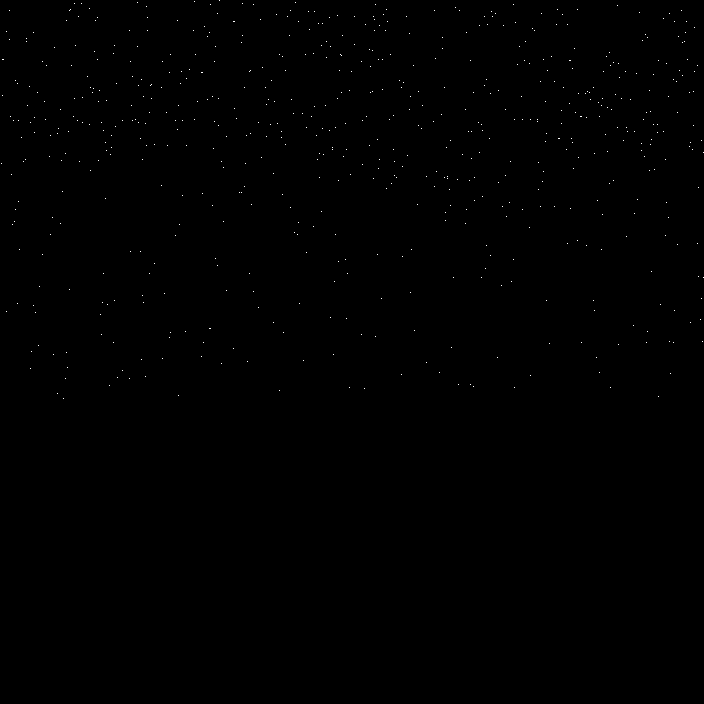

In [36]:
loader.color_mask([255,255,255])
star_mask = loader.mask

loader.color_mask([255,0,0])
meteor_mask = loader.mask

sky_mask = meteor_mask | star_mask
cv2_imshow(sky_mask)

In [37]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
!wget https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
!sudo mv -v por.traineddata /usr/share/tesseract-ocr/4.00/tessdata

In [ ]:
import cv2
import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Apply thresholding to create a binary image
# _, binary = cv2.threshold(sky_mask, 0, 255, cv2.THRESH_BINARY)
ret, threshold = cv2.threshold(sky_mask,150,255,cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours and extract the coordinates of their points
dots = []
for contour in contours:
    coords = []
    for point in contour:
        coords.append(tuple(point[0]))
    dots.append(coords)

# Group the dots based on their proximity to each other
groups = []
while len(dots) > 0:
    group = [dots[0]]
    dots.pop(0)
    i = 0
    while i < len(group):
        j = 0
        while j < len(dots):
            dist = np.linalg.norm(np.array(group[i]) - np.array(dots[j]))
            if dist < 20:
                group.append(dots[j])
                dots.pop(j)
                j -= 1
            j += 1
        i += 1
    groups.append(group)

# Extract the hidden phrase by applying text recognition to the grouped dots
phrase = ""
for group in groups:

    print(group)
    x, y, w, h = cv2.boundingRect(np.array(group))
    cropped = meteor_mask[y:y+h, x:x+w]
    text = pytesseract.image_to_string(cropped, lang='por', config='--psm 6')
    print(text)
    phrase += text.strip()

print("Hidden phrase:", phrase)